In [1]:
import sys 
sys.path.append('./models/')
from SIR import SIRD_model, sir_for_optim
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('deaths_and_infections.csv')

# remove a columns from a df: 
df.drop(columns=['Unnamed: 0'], inplace=True)
new_deaths=np.array(df['new_deaths'])
death_cumul=np.array([sum(new_deaths[:i]) for i in range(len(new_deaths))])
dates_of_pandemic=np.arange(len(new_deaths))

In [3]:
mymodel = SIRD_model()  
mymodel.train(dates_of_pandemic[:33], new_deaths[:33])

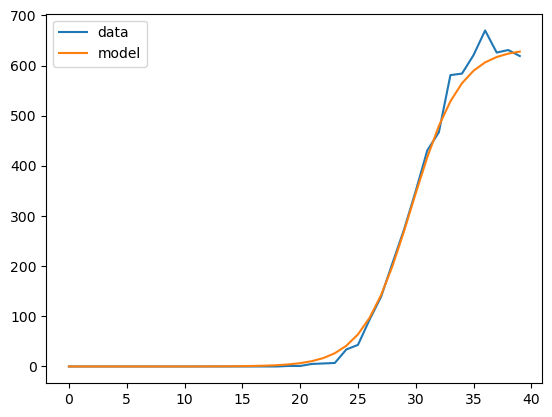

In [4]:
plt.plot(dates_of_pandemic[:40], new_deaths[:40], label='data')
pred=sir_for_optim(np.array([i for i in range(40)]), mymodel.beta, mymodel.gamma, mymodel.d)
plt.plot(dates_of_pandemic[:40], pred, label='model')
plt.legend()
plt.show()

In [5]:
pred, ints=mymodel.predict(7,0.05)

In [6]:
ints

[array([0., 0., 0., 0., 0., 0., 0.]),
 array([1063.5755302 , 1046.89362749, 1033.11368244, 1056.82904879,
        1072.68684798, 1082.85583021, 1132.664166  ])]

In [7]:
print(mymodel.beta, mymodel.gamma, mymodel.d)
print(mymodel.beta_sampled)

0.47469723393477037 1.1186056359623869e-17 0.0006394016064400492
[0.47529538979624736, 0.31189266949413885, 0.3681125501517814, 0.3026133744263768, 0.4261251062591416, 0.59097723531893, 0.45290916270424825, 0.519934053868395, 0.5237676699285316, 0.5506366455423674, 0.3003855489450178, 0.3543871573029, 0.4584403123410817, 0.25058496413043513, 0.37682192786903757, 0.33476583048870845, 0.3841996807798013, 0.5696444570394602, 0.4691192295367197, 0.38690753213187445, 0.7514456102802445, 0.5768331121434551, 0.429501288636692, 0.7779536701699525, 0.28045462368112656, 0.4105010713898478, 0.3827881173990391, 0.46928882112594345, 0.36046644870793537, 0.6106098924942278, 0.3755563522943109, 0.3828197484909004, 0.5416298435444531, 0.7495249782655515, 0.5016725009026053, 0.40522182939424245, 0.5870680169034566, 0.3283514708602412, 0.47017795010699626, 0.5279830614591137, 0.38051370127947404, 0.6143683492197028, 0.6143315130018399, 0.13393051287904928, 0.52040266220966, 0.08576267634669699, 0.674355

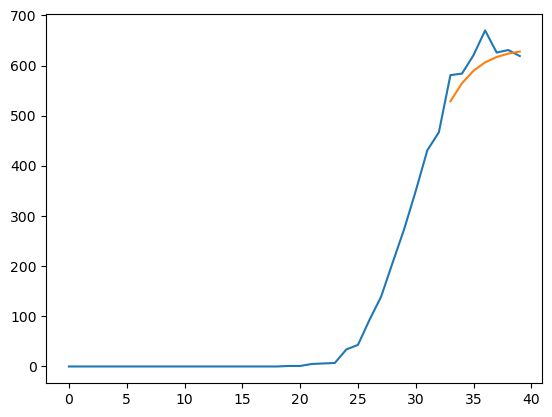

In [8]:
plt.plot(dates_of_pandemic[:40], new_deaths[:40], label='data')
plt.plot(dates_of_pandemic[33:40], pred, label='model')

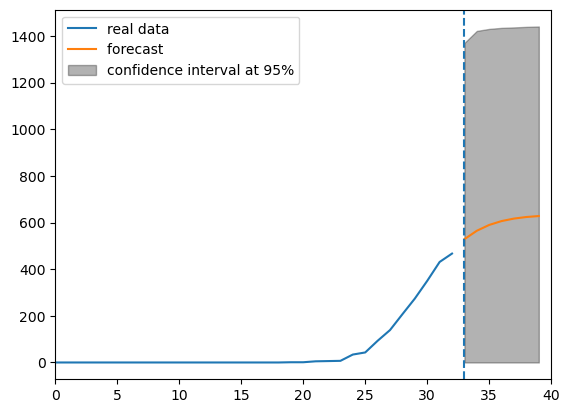

In [9]:
mymodel.plot(7,0.05)

In [10]:
beta=mymodel.beta
gamma=mymodel.gamma
d=mymodel.d

pred=sir_for_optim(np.array([i for i in range((122))]), beta, gamma, d)

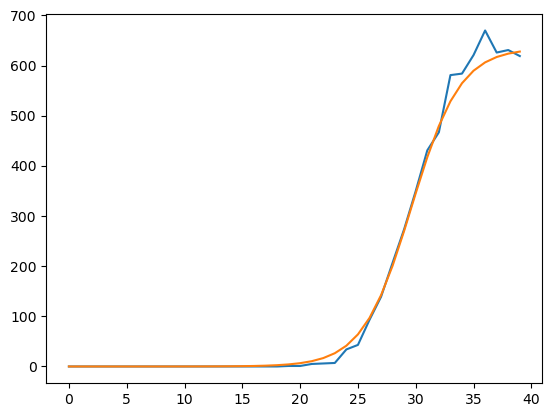

In [11]:
plt.plot(new_deaths[:40])
plt.plot(pred[:40])

In [12]:
from Arima import ARIMA_Model